<a href="https://colab.research.google.com/github/zarrarkhawaja123/IMDb-Movies-Reviews-Sentiment-Analysis/blob/main/sentiment_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/IMDBDataset.csv')
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

data['review'] = data['review'].apply(preprocess_text)
print("Text Preprocessing Done!")

Text Preprocessing Done!


In [ ]:

X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset Split Successfully!")

Dataset Split Successfully!


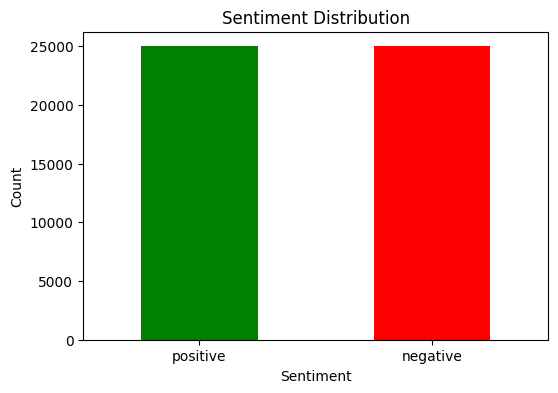

In [ ]:
# EDA: Visualizing sentiment distribution
plt.figure(figsize=(6, 4))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Text Vectorization Done!")

Text Vectorization Done!


In [ ]:
# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Naive Bayes Model
print("\nNaive Bayes Results:")
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train_vec, X_test_vec, y_train, y_test)


Naive Bayes Results:
Accuracy: 0.8495
Precision: 0.8477
Recall: 0.8549
F1 Score: 0.8513
ROC-AUC Score: 0.8495
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Logistic Regression Model
print("\nLogistic Regression Results:")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train_vec, X_test_vec, y_train, y_test)


Logistic Regression Results:
Accuracy: 0.8848
Precision: 0.8764
Recall: 0.8980
F1 Score: 0.8871
ROC-AUC Score: 0.8847
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [ ]:
# Compare models visually
models = ['Naive Bayes', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
results = []

In [ ]:
for model in [nb_model, lr_model]:
    y_pred = model.predict(X_test_vec)
    results.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
    ])

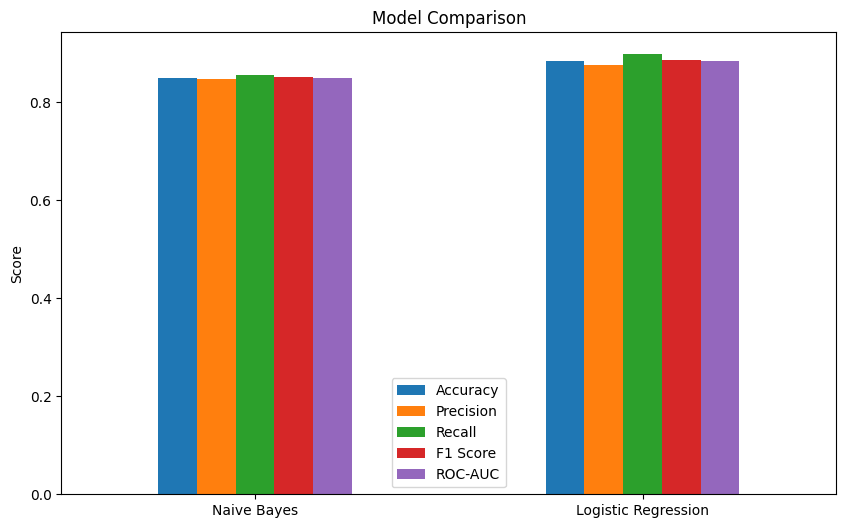

In [ ]:
results_df = pd.DataFrame(results, columns=metrics, index=models)
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

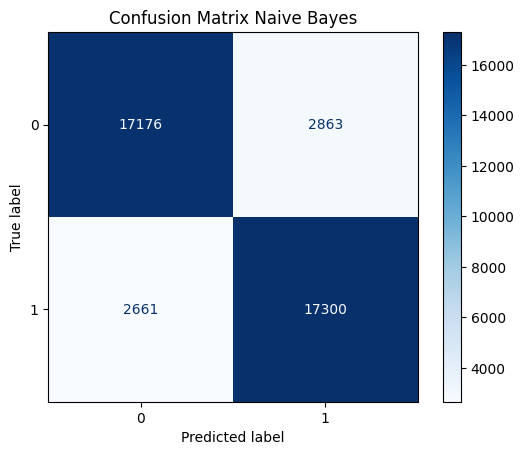

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = nb_model.predict(X_train_vec)
cm = confusion_matrix(y_train, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Naive Bayes")
plt.show()


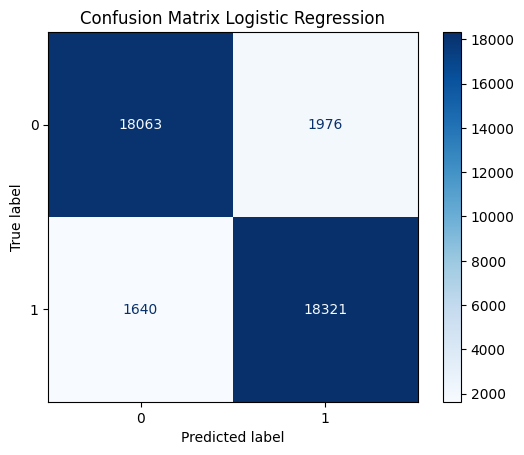

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = lr_model.predict(X_train_vec)

cm = confusion_matrix(y_train, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.show()
